In [32]:
import matplotlib.pyplot as plt
from datasets import load_dataset
import transformers
import tokenizers

plt.style.use('ggplot')

## The Dataset

docs" https://huggingface.co/docs/datasets/load_hub

In [5]:
emotions = load_dataset("emotion")

No config specified, defaulting to: emotion/split


Extracting data files: 100%|██████████| 3/3 [00:00<00:00, 210.25it/s]


Dataset emotion downloaded and prepared to /home/kaspar/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


100%|██████████| 3/3 [00:00<00:00, 1225.57it/s]


In [9]:
emotions.set_format(type='pandas')

In [21]:
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [36]:
def label_int2string(i):
    return emotions['train'].features['label'].int2str(i)

df['label_name'] = df.label.apply(label_int2string)
df['n_words'] = df.text.apply(lambda x: len(x.split()) )
df.head()

,text,label,label_name,text_length,n_words
0,i didnt feel humiliated,0,sadness,23,4
1,i can go from feeling so hopeless to so damned...,0,sadness,108,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,48,10
3,i am ever feeling nostalgic about the fireplac...,2,love,92,18
4,i am feeling grouchy,3,anger,20,4


<Axes: ylabel='label_name'>

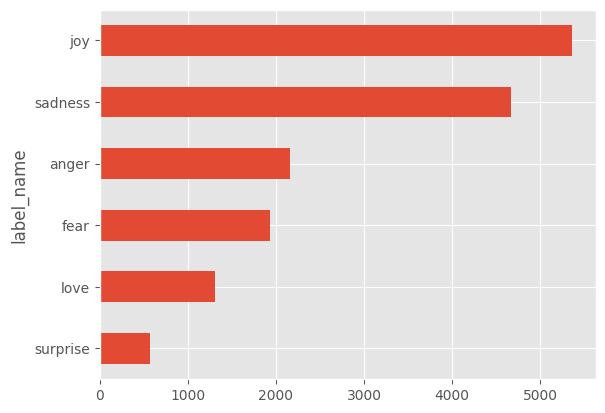

In [44]:
(
    df
    .label_name
    .value_counts(ascending=True)
    .plot(kind='barh')
)

<Axes: title={'center': 'n_words'}, xlabel='label_name'>

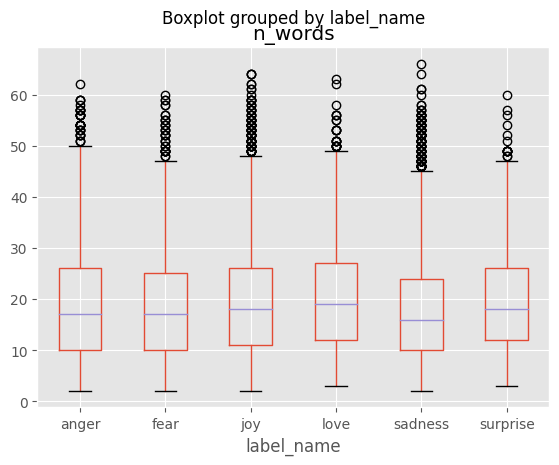

In [37]:
(
    df
    .boxplot('n_words', by='label_name')
)

In [41]:
emotions.set_format()
emotions['train'][:]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy',
  'ive been feeling a little burdened lately wasnt sure why that was',
  'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
  'i feel as confused about life as a teenager or as jaded as a year old man',
  'i have been with petronas for years i feel that petronas has performed well and made a huge profit',
  'i feel romantic too',
  'i feel like i have to make the suffering i m seeing mean something',
  'i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter',
  'i think it s the easiest time of year to feel dissatisfied',
  'i feel low 